# Soundscapes Through Time
## An Analysis of Music trends from the year 1920 to 2020

In the span of a century, from 1920 to 2020, the world of music has undergone a remarkable evolution. This analysis report delves into the intricate evolution of audio features over time, offering insights into the changing landscapes of music and sound. From the era of vinyl records to the digital streaming age, we explore how key audio attributes have shifted, providing a unique perspective on the musical journey through the 20th and 21st centuries. Using data-driven analysis, we aim to uncover the patterns, innovations, and cultural influences that have shaped the auditory experience of generations past and present.

**Authors**:
1. Dhanavikram Sekar
2. Hariharan Anbumurugan
3. Hariharan Kumar
4. Maiqi Hou
5. Naveen Vinayaga Murthy
6. Ziqian Wang

**Question of Interest**: Has audio feautres of songs evolved over time? How has that affected the popularity?

### Data Collection

**Source of Data**: https://data.world/babarory/spotify-dataset-1921-2020

The data was collected from Spotify API by the author. At present(2023), Spotify has limited the number of songs a user can fetch from the API (2000 songs max). Hence this dataset was used to analyze the evolution of audio features.

### Analysis of audio features

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# reading the datset and printing top 5 rows
df = pd.read_csv('spotify.csv')
df.head(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [2]:
# summarizing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

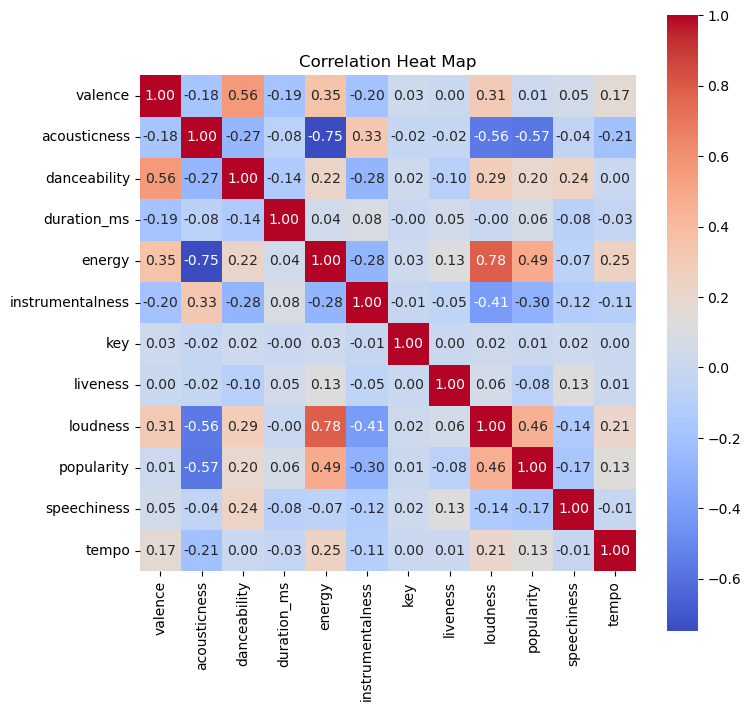

In [3]:
# computing and plotting correlation matrix
correlation_matrix = df[['valence', 'acousticness', 'danceability', 'duration_ms',
                         'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
                         'popularity', 'speechiness', 'tempo']].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heat Map')
plt.show()

To learn more about the degree of association between variables, a correlation heatmap has been plotted. A higher correlation value (close to 1) indicates a stronger positive relationship, suggesting that as one variable increases, the other is likely to follow suit. Conversely, values closer to -1 signify a strong negative correlation, implying that as one variable increases, the other tends to decrease. A correlation of 0 implies no significant relationship between the variables.

Two key correlations stand out in our analysis:

1. **Energy and Loudness (0.78)**: This high positive correlation indicates that energetic music tends to be louder.
2. **Energy and Acousticness (-0.75)**: This strong negative correlation suggests that energetic music is less likely to have acoustic qualities.

### Comparison of 1921 and 2020 in terms of audio features

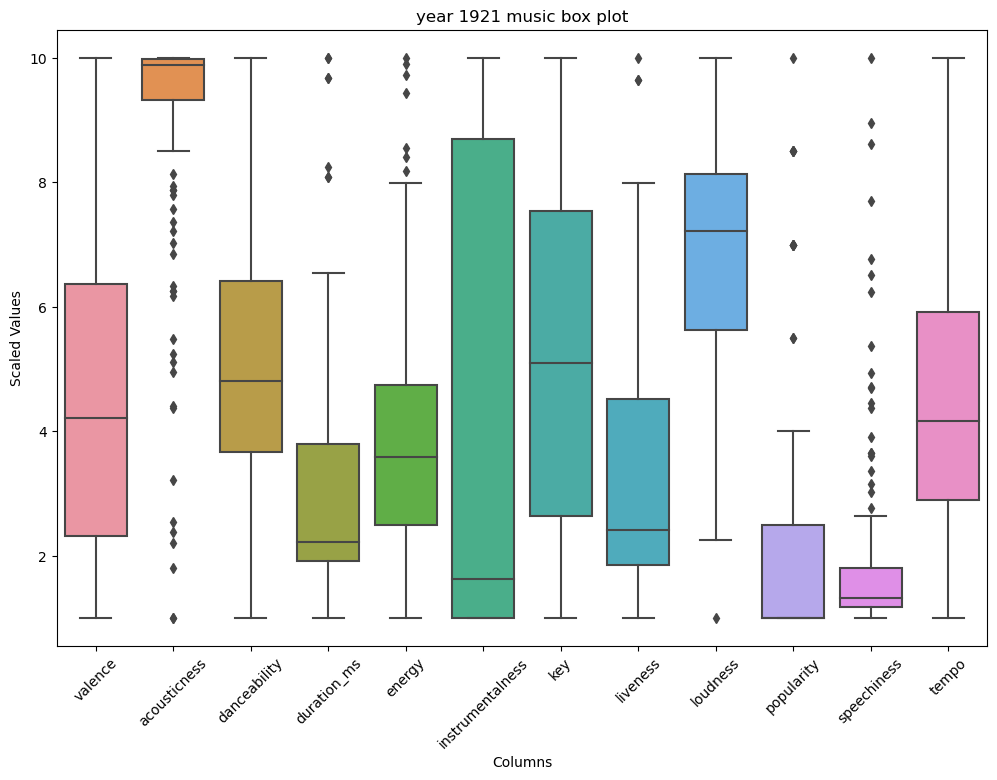

In [4]:
# creating seperate datframes for the years 2020 and 1921 for comparing the audio features
df_2020 = df[df['year'] == 2020]
df_1921 = df[df['year'] == 1921]



df_2020 = df_2020[['valence', 'acousticness', 'danceability',
                   'duration_ms', 'energy', 'instrumentalness',
                   'key', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo']]
scaler = MinMaxScaler(feature_range=(1, 10))
scaled_2020 = scaler.fit_transform(df_2020)
scaled_2020 = pd.DataFrame(scaled_2020, columns=df_2020.columns)


df_1921 = df_1921[['valence', 'acousticness', 'danceability',
                   'duration_ms', 'energy', 'instrumentalness',
                   'key', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo']]
scaler = MinMaxScaler(feature_range=(1, 10))
scaled_1921 = scaler.fit_transform(df_1921)
scaled_1921 = pd.DataFrame(scaled_1921, columns=df_1921.columns)


scaled_2020.dropna()
scaled_1921.dropna()

# plotting the box plot of audio feautures for year 1921
plt.figure(figsize=(12, 8))
sns.boxplot(data=scaled_1921, orient='v')
plt.xlabel('Columns')
plt.ylabel('Scaled Values')
plt.title('year 1921 music box plot')
plt.xticks(rotation=45)
plt.show()

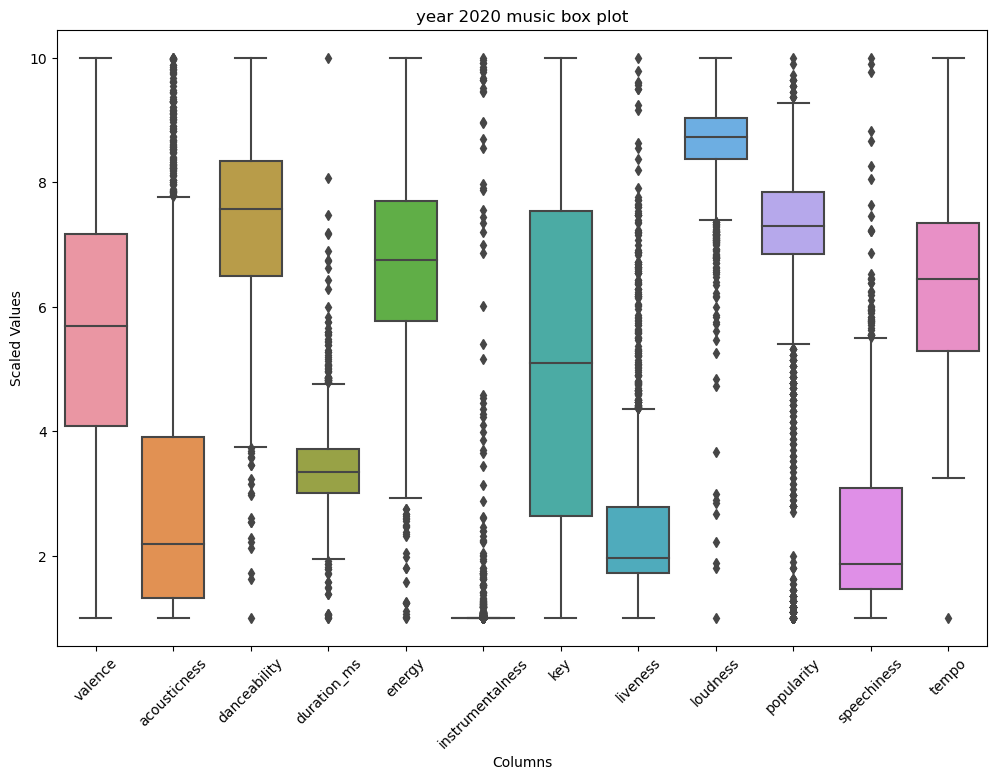

In [5]:
# plotting the box plot of audio feautures for year 2020
plt.figure(figsize=(12, 8))
sns.boxplot(data=scaled_2020, orient='v')
plt.xlabel('Columns')
plt.ylabel('Scaled Values')
plt.title('year 2020 music box plot')
plt.xticks(rotation=45)
plt.show()

Overall, the 2020 box plot shows a wider range of values for all audio features, suggesting that songs in  2020 had a more diverse range of sounds than songs in 1921.
These changes suggest that songs in 2020 had a more modern and diverse sound profile than songs in 1921. This is likely due to a number of factors, including the development of new musical genres and technologies.

We could see a lot of difference between 1921 and 2020 data in some key features like accousticness, instrumentalness, loudness and a notable increase in speechiness over the years.

Some possible interpretations of these changes:
* The increase in median valence suggests that songs in 2020 are more likely to play upbeat and positive-sounding music. This may be due to the popularity of genres such as pop and hip hop, which are often characterized by upbeat melodies and positive lyrics.
* The decrease in median acousticness suggests that songs in 2020 are more likely to play electronic music. This may be due to the increasing popularity of electronic dance music genres such as house and techno.
* The increase in median danceability suggests that songs in 2020 are more likely to play music that is meant to be danced to. This is consistent with the popularity of electronic dance music genres and other genres such as pop and hip hop, which are often characterized by danceable beats.
* The decrease in median duration_ms suggests that songs in 2020 are more likely to play shorter. This may be due to the increasing popularity of streaming services, which make it easier to listen to shorter songs on demand.
* The increase in median energy suggests that songs in 2020 are more likely to play music with a high energy level. This is consistent with the popularity of electronic dance music genres and other genres such as pop and hip hop, which are often characterized by energetic beats.
* The decrease in median instrumentalness suggests that songs in 2020 are more likely to play music with vocals. This is consistent with the popularity of genres such as pop and hip hop, which are often characterized by vocals.


### Audio Features and Popularity

In this popularity analysis, we have chose three features.
* Danceability
* Tempo
* Valence

We chose these features because, these features are the closest that can represent the mood of a song(happy/sad/slow). Since there is a lot of correlation between danceability and energy, only one has been chosen. We are trying to find which type of song, people of each generation loved.

#### Danceability  vs Popularity

In [6]:
# creating a function for setting range for danceablity
def popular_dance(danceability):
  if 0.0 <= danceability <= 0.359:
        return '0.0 - 0.359'
  elif danceability > 0.36:
      return '> 0.36'
df['danceability_range'] = df['danceability'].apply(popular_dance)

result = df.groupby(['year', 'danceability_range'])['popularity'].sum().reset_index()
result

# creating function for setting up decade of years as range
def decade_dance_populr(year):
  if 1921 <= year <= 1940:
    return '1921-1940'
  elif 1941 <= year <= 1960:
    return '1941-1960'
  elif 1961 <= year <= 1980:
    return '1961-1980'
  elif 1981 <= year <= 2000:
    return '1981-2000'
  elif 2001 <= year <= 2020:
    return '2001-2020'
result['20Years'] = result['year'].apply(decade_dance_populr)
result = result.groupby(['20Years','danceability_range'])['popularity'].sum().reset_index()
result = result.rename(columns = {'danceability_range':'danceability'})

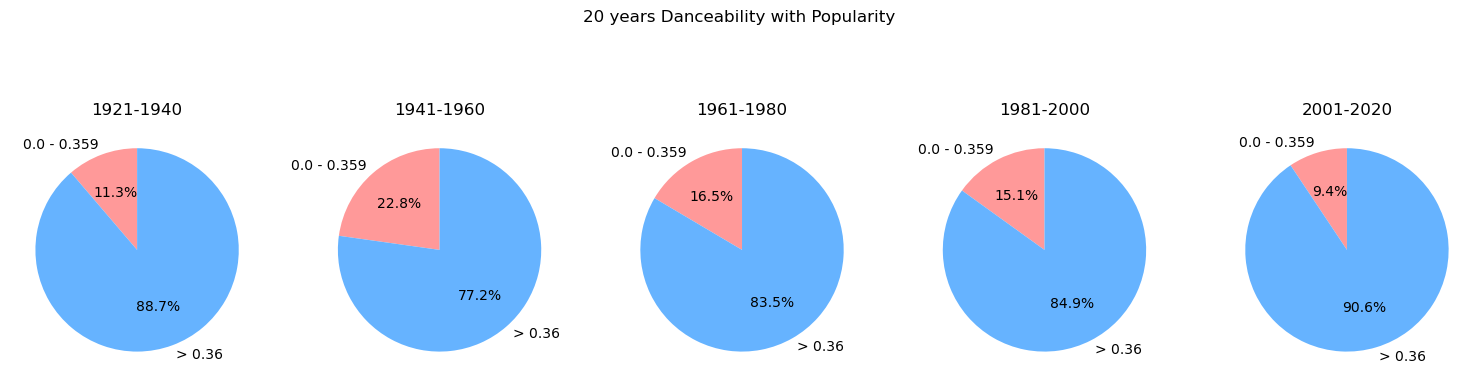

In [7]:
# comparing and plotting pie charts for 20 years of danceablity and popularity of the songs
year_ranges = result['20Years'].unique()
fig, axes = plt.subplots(1, len(year_ranges), figsize=(15, 5))

for i, year_range in enumerate(year_ranges):
    subset = result[result['20Years'] == year_range]
    sizes = subset['popularity']
    labels = subset['danceability']
    colors = ['#ff9999', '#66b3ff']
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i].set_title(f'{year_range}')
plt.tight_layout()
plt.suptitle('20 years Danceability with Popularity')
plt.show()

Here, we analyze the correlation between danceability and music popularity over the span of every two decades. What becomes evident is a consistent trend: irrespective of the era, people consistently gravitate towards music with high danceability. Notably, during the years 2001 to 2020, we observe a remarkable phenomenon where music's popularity is closely linked to its danceability, with a staggering 90% of music falling into this category.

Additionally, this pattern can be interpreted as an enduring preference among listeners for music that encourages movement and dance, transcending time periods. The data underscores that music with greater danceability tends to resonate more with audiences and maintain a strong presence in the realm of popular music. This could signify a fundamental and unchanging aspect of human musical taste.


#### Tempo vs Popularity

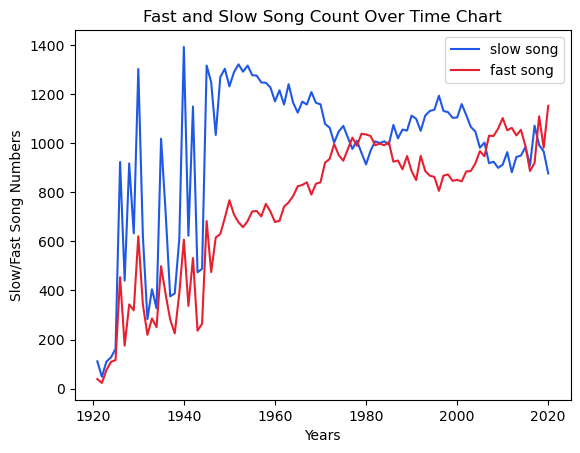

In [8]:
# function for categorizing whether the song is slow or fast
def tempo_type (tempo):
  if tempo <= 120.000:
        return 'slow song'
  else:
      return 'fast song'


df['tempo_type'] = df['tempo'].apply(tempo_type)

result1 = df.groupby('year')['tempo_type'].value_counts().unstack(fill_value=0).reset_index()
result1.columns.name = None

# plotting the line graph for seeing the trends of slow and fast songs over the years
result1.plot(x = 'year', y = ['slow song','fast song'], kind = 'line',color=['#2058e6','#e62031'])
plt.title('Fast and Slow Song Count Over Time Chart')
plt.xlabel('Years')
plt.ylabel('Slow/Fast Song Numbers')
plt.show()

In the period of 1920s to 1940s, there were a lot of slow songs being released, but after 1950, their numbers started going down. On the other hand, fast songs have been getting more and more popular over the years. The number of fast songs being released was about the same as slow songs during 1980s. The number of fast songs started coming out more often than slow songs after the 2000s.

The interpretation of this information suggests that there has been a shift in musical preferences over time. In the past, slow songs were very popular, but their popularity started declining after 1970. Meanwhile, fast songs have become increasingly popular, and by 2000s, they were being released more frequently than slow songs. This could reflect changing tastes in music, with people gravitating toward faster and more upbeat tunes in the most recent decade.

#### Generation-wise Valence vs Popularity

In [9]:
spotify_df = df.copy(deep=True)

In [10]:
# Categorizing whether the songs are happy, sad or neutral
l1,l2 = [],[]
for i in spotify_df['valence']:
    if(i <= 0.4):
        l1.append("Sad")
    elif(i > 0.4 and i<0.7):
        l1.append("Neutral")
    elif(i>=0.7):
        l1.append("Happy")

# labelling songs based on popularity
for item in spotify_df['popularity']:
    if(item <= 30):
        l2.append("Not that popular")
    elif(30 <item<= 60):
        l2.append("Moderately popular")
    elif(item > 60):
        l2.append("Highly popular")

In [11]:
# adding new columns to the dataframe
new_df = pd.DataFrame({'Valence_Type':l1,'Year':spotify_df["year"],'Popularity': spotify_df["popularity"],'Popularity_Level': l2})


In [12]:
# displaying the count of highly popular sad songs every two decades
sad_count_df = new_df[new_df['Valence_Type'].str.contains("Sad")].groupby(([new_df['Year'],'Popularity_Level'])).size().reset_index(name='count')

sad_20_to_45 = sad_count_df.iloc[0:46]
twenties_to_midforties = sad_20_to_45.groupby('Popularity_Level').agg({'count':'sum'}).reset_index()
twenties_to_midforties.insert(0, 'Every_Two_Decades', ["1921-1945(sad)","1921-1945(sad)","1921-1945(sad)"])

sad_45_to_70 = sad_count_df.iloc[46:114]
midforties_to_seventies = sad_45_to_70.groupby('Popularity_Level').agg({'count':'sum'}).reset_index()
midforties_to_seventies.insert(0, 'Every_Two_Decades', ["1946-1970(sad)","1946-1970(sad)","1946-1970(sad)"])

sad_70_to_95 = sad_count_df.iloc[114:189]
seventies_to_midnineties = sad_70_to_95.groupby('Popularity_Level').agg({'count':'sum'}).reset_index()
seventies_to_midnineties.insert(0, 'Every_Two_Decades', ["1971-1995(sad)","1971-1995(sad)","1971-1995(sad)"])

sad_95_to_2020 = sad_count_df.iloc[189:254]
midnineties_to_2020 = sad_95_to_2020.groupby('Popularity_Level').agg({'count':'sum'}).reset_index()
midnineties_to_2020.insert(0, 'Every_Two_Decades', ["1996-2020(sad)","1996-2020(sad)","1996-2020(sad)"])

all_sad_data_list = [twenties_to_midforties.iloc[:1],midforties_to_seventies.iloc[:1],seventies_to_midnineties.iloc[:1],midnineties_to_2020.iloc[:1]]
all_sad_songs = pd.concat(all_sad_data_list).reset_index(drop=True)
print(all_sad_songs)

  Every_Two_Decades Popularity_Level  count
0    1921-1945(sad)   Highly popular      4
1    1946-1970(sad)   Highly popular    111
2    1971-1995(sad)   Highly popular    504
3    1996-2020(sad)   Highly popular   5233


In [13]:
# displaying the count of highly popular happy songs every two decades
happy_count_df = new_df[new_df['Valence_Type'].str.contains("Happy")].groupby([new_df['Year'],'Popularity_Level']).size().reset_index(name='count')

happy_20_to_45 = happy_count_df.iloc[0:40]
happy_1920_45 = happy_20_to_45.groupby('Popularity_Level').agg({'count':'sum'}).reset_index()
happy_1920_45.insert(0, 'Every_Two_Decades', ["1921-1945(happy)","1921-1945(happy)"])
new_row = pd.DataFrame({'Every_Two_Decades': '1921-1945(happy)', 'Popularity_Level': 'Highly Popular', 'count': 0},index = [0])
happy_1920_45 = pd.concat([new_row, happy_1920_45[:]]).reset_index(drop = True)

happy_45_to_70 = happy_count_df.iloc[40:110]
happy_1945_70 = happy_45_to_70.groupby('Popularity_Level').agg({'count':'sum'}).reset_index()
happy_1945_70.insert(0, 'Every_Two_Decades', ["1946-1970(happy)","1946-1970(happy)","1946-1970(happy)"])

happy_70_to_95 = happy_count_df.iloc[110:185]
happy_1970_95 = happy_70_to_95.groupby('Popularity_Level').agg({'count':'sum'}).reset_index()
happy_1970_95.insert(0, 'Every_Two_Decades', ["1971-1995(happy)","1971-1995(happy)","1971-1995(happy)"])

happy_95_to_2020 = happy_count_df.iloc[185:251]
happy_1995_2020 = happy_95_to_2020.groupby('Popularity_Level').agg({'count':'sum'}).reset_index()
happy_1995_2020.insert(0, 'Every_Two_Decades', ["1996-2020(happy)","1996-2020(happy)","1996-2020(happy)"])

all_happy_data_list = [happy_1920_45.iloc[:1],happy_1945_70.iloc[:1],happy_1970_95.iloc[:1],happy_1995_2020.iloc[:1]]
all_happy_songs = pd.concat(all_happy_data_list).reset_index(drop=True)
print(all_happy_songs)

  Every_Two_Decades Popularity_Level  count
0  1921-1945(happy)   Highly Popular      0
1  1946-1970(happy)   Highly popular    206
2  1971-1995(happy)   Highly popular    836
3  1996-2020(happy)   Highly popular   2955


Text(0.5, 1.0, 'Popularity of happy and sad songs from Twenties to Mid-Fourties')

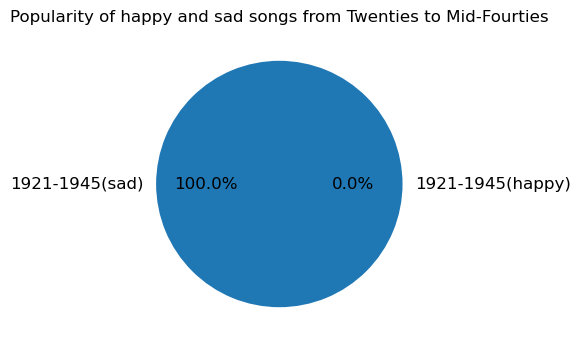

In [14]:
# plotting pie chart to compare the sad and happy songs for the years 1921 - 1945
sad_happy_1920_to_45_list = [all_sad_songs.iloc[0:1],all_happy_songs.iloc[0:1]]
sad_happy_1920_to_45 = pd.concat(sad_happy_1920_to_45_list).reset_index(drop = True)

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(x = sad_happy_1920_to_45['count'],labels = sad_happy_1920_to_45['Every_Two_Decades'],
       autopct='%.1f%%',textprops={'size': 'large'})
ax.set_title('Popularity of happy and sad songs from Twenties to Mid-Fourties')

We can't really derive any analysis from plot 1 since the songs from 1921-1945 are scarce and aren't being streamed that much. This is further explained in the Possible Source of Bias section below.

The one takeway we can get from this data is that the songs from this era are being forgotten sadly due to lack of people from that time period.

Text(0.5, 1.0, 'Popularity of happy and sad songs from Mid-Forties to Seventies')

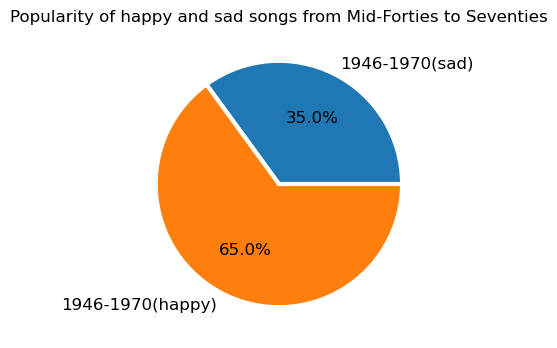

In [15]:
# plotting pie chart to compare the sad and happy songs for the years 1946 - 1970
sad_happy_1945_to_70_list = [all_sad_songs.iloc[1:2],all_happy_songs.iloc[1:2]]
sad_happy_1945_to_70 = pd.concat(sad_happy_1945_to_70_list).reset_index(drop = True)

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(x = sad_happy_1945_to_70['count'],labels = sad_happy_1945_to_70['Every_Two_Decades'],autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'large'})
ax.set_title('Popularity of happy and sad songs from Mid-Forties to Seventies')

We can see that the happy songs from this era are being played more than the sad songs. This can be because:

* Rock and Roll Emergence (1950s): The mid-1950s marked the birth of rock and roll, a genre that blended elements of rhythm and blues with country music.
* British Invasion (1960s): In the 1960s, British rock bands like The Beatles, The Rolling Stones, and The Who took the music scene by storm. This "British Invasion" reshaped the landscape of popular music and introduced a new wave of rock.

Since this time period's music is pre-dominantly defined by jazz and the birth of Rock & Roll, people fondly remember the happier and energetic songs from the time and stream them today.

Text(0.5, 1.0, 'Popularity of happy and sad songs from Seventies to Mid-Nineties')

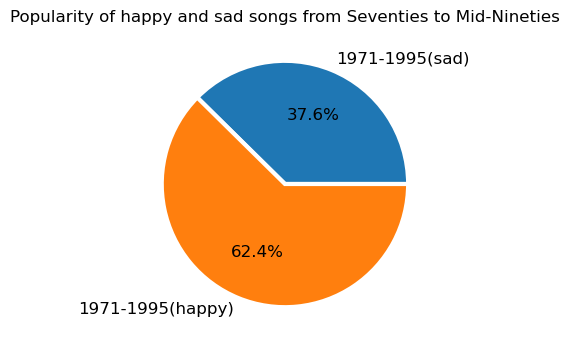

In [16]:
# plotting pie chart to compare the sad and happy songs for the years 1971 - 1995
sad_happy_1970_to_95_list = [all_sad_songs.iloc[2:3],all_happy_songs.iloc[2:3]]
sad_happy_1970_to_95 = pd.concat(sad_happy_1970_to_95_list).reset_index(drop = True)

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(x = sad_happy_1970_to_95['count'],labels = sad_happy_1970_to_95['Every_Two_Decades'],autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'large'})
ax.set_title('Popularity of happy and sad songs from Seventies to Mid-Nineties')

We can see the same trend carrying on from the previous plot. Some of the notable evoluations in music during this period are:

* Funk (1970s): Funk music continued to evolve with artists like Parliament-Funkadelic and Prince pushing the boundaries of the genre.
* R&B (1980s): The 1980s saw the rise of R&B and soul artists such as Michael Jackson, Whitney Houston, and Prince, who achieved immense success.
* Hip-Hop (80's and Early 90's): Hip-hop emerged in the Bronx, New York, and became a cultural force, with pioneers like Grandmaster Flash, Run-D.M.C., and Public Enemy shaping the genre.

Since this era's music space is shaped by Funk ,R&B, and emergence of Hip-hop people still gravitate towards happier songs from that time.

Text(0.5, 1.0, 'Popularity of happy and sad songs in Mid-Nineties to Twenty Twenty')

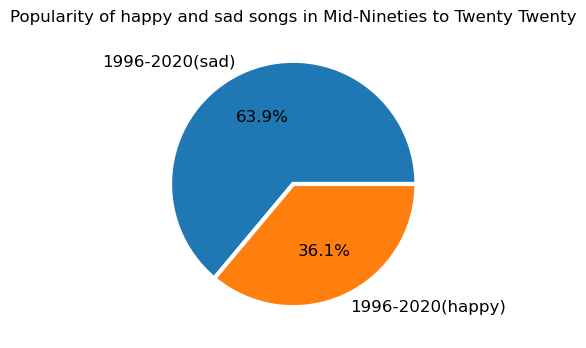

In [17]:
# plotting pie chart to compare the sad and happy songs for the years 1996 - 2020
sad_happy_1995_to_2020_list = [all_sad_songs.iloc[3:4],all_happy_songs.iloc[3:4]]
sad_happy_1995_to_2020 = pd.concat(sad_happy_1995_to_2020_list).reset_index(drop = True)

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(x = sad_happy_1995_to_2020['count'],labels = sad_happy_1995_to_2020['Every_Two_Decades'],autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'large'})
ax.set_title('Popularity of happy and sad songs in Mid-Nineties to Twenty Twenty')

We can see a seismic shift in the paradigm where sad songs are being streamed more than happy songs from the past 25 years. This is likely due to a number of factors, such as the cathartic and emotional nature of sad songs.


## Possible Source of Bias

It is also important to note that this data is biased. The songs from 1920 might have been more popular but we could not find it as people didn't have any streaming services or the internet back then. We do not have any data about that period as well.

It also has a relatively smaller sample size. It is possible that the results would be different if we had a larger sample size and more data about the popularity of those songs based on the period. It is also important to note that the pie charts do not take into account other factors that could influence people's choice of music, such as their age, gender, and culture.


## Conclusion

  In summary, the analysis indicates that music in 2020 displayed a more diverse and contemporary sound profile when compared to 1921, driven by the emergence of new musical genres and advancements in technology. Notable trends include a preference for upbeat and positive music, potentially linked to the popularity of genres like pop and hip-hop, along with a growing affinity for shorter, more energetic, and danceable tracks. This shift from slower to faster songs reflects changing musical tastes over time.

  However, it's crucial to acknowledge the potential limitations of the data, particularly regarding the listening preferences for happy and sad songs, as these may be influenced by sample size and biases. Despite these considerations, the analysis provides valuable insights into the ever-evolving landscape of music and the enduring appeal of certain musical characteristics across different eras.
